## Bag of words and TF-IDF
Term Frequency and Inverted Document Frequency

In [3]:
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests
import re

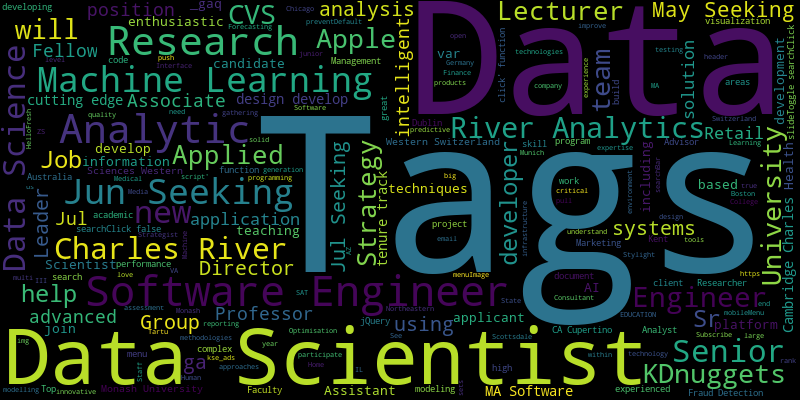

In [10]:
response = requests.get("http://www.datasciencecourse.org")
response = requests.get("https://www.kdnuggets.com/jobs/index.html")
root = BeautifulSoup(response.text, 'lxml')
wc = WordCloud(width=800, height=400).generate(re.sub(r"\s+"," ",root.text))
wc.to_image()

In [11]:
documents = ["the goal of this lecture is to explain the basics of free text processing",
             "the bag of words model is one such approach",
             "text processing via bag of words"]

In [15]:
document_words = [doc.split() for doc in documents]
vocab = sorted(set(sum(document_words,[])))
vocab_dict = {k:i for i,k in enumerate(vocab)}
vocab_dict   # setting up a vocab dictionary

{'approach': 0,
 'bag': 1,
 'basics': 2,
 'explain': 3,
 'free': 4,
 'goal': 5,
 'is': 6,
 'lecture': 7,
 'model': 8,
 'of': 9,
 'one': 10,
 'processing': 11,
 'such': 12,
 'text': 13,
 'the': 14,
 'this': 15,
 'to': 16,
 'via': 17,
 'words': 18}

In [17]:
import numpy as np
X_tf = np.zeros((len(documents), len(vocab)),dtype=int)
for i,doc in enumerate(document_words):
    for word in doc:
        X_tf[i,vocab_dict[word]] += 1
print(X_tf)

[[0 0 1 1 1 1 1 1 0 2 0 1 0 1 2 1 1 0 0]
 [1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1]]


### IDF (Inverted Document Frequency) of a word j = log(number of documents / number of documents with word j)

In [18]:
idf = np.log(X_tf.shape[0] / X_tf.astype(bool).sum(axis=0))
idf

array([1.09861229, 0.40546511, 1.09861229, 1.09861229, 1.09861229,
       1.09861229, 0.40546511, 1.09861229, 1.09861229, 0.        ,
       1.09861229, 0.40546511, 1.09861229, 0.40546511, 0.40546511,
       1.09861229, 1.09861229, 1.09861229, 0.40546511])

### TFIDF

In [20]:
X_tfidf = X_tf * idf
print(X_tfidf)

[[0.         0.         1.09861229 1.09861229 1.09861229 1.09861229
  0.40546511 1.09861229 0.         0.         0.         0.40546511
  0.         0.40546511 0.81093022 1.09861229 1.09861229 0.
  0.        ]
 [1.09861229 0.40546511 0.         0.         0.         0.
  0.40546511 0.         1.09861229 0.         1.09861229 0.
  1.09861229 0.         0.40546511 0.         0.         0.
  0.40546511]
 [0.         0.40546511 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.40546511
  0.         0.40546511 0.         0.         0.         1.09861229
  0.40546511]]


## Cosine similarity on TFIDF

In [25]:
X_tfidf_norm = X_tfidf / np.linalg.norm(X_tfidf, axis=1)[:,None]
M = X_tfidf_norm @ X_tfidf_norm.T
print(M)

[[1.         0.06796739 0.07771876]
 [0.06796739 1.         0.10281225]
 [0.07771876 0.10281225 1.        ]]


## Cosine similarity on TF

In [27]:
X_tf_norm = X_tf / np.linalg.norm(X_tf,axis = 1)[:,None]
M = X_tf_norm @ X_tf_norm.T
print(M) # seems to be little higher projection of similarilty in comparison with TFIDF cosine similarity

[[1.         0.3928371  0.38490018]
 [0.3928371  1.         0.40824829]
 [0.38490018 0.40824829 1.        ]]
